# Support Vector Machine (SVM)

Invented in [1963](https://en.wikipedia.org/wiki/Support_vector_machine#History) by [Vladimir N. Vapnik](https://en.wikipedia.org/wiki/Vladimir_Vapnik) and Alexey Ya. Chervonenkis while working at AT&T Bell Labs. Vladimir N. Vapnik joined Facebook AI Research in Nov 2014.

In 1992, Bernhard E. Boser, Isabelle M. Guyon and Vladimir N. Vapnik suggested a way to create nonlinear classifiers by applying the kernel trick to maximum-margin hyperplanes.

The current standard incarnation (soft margin) was proposed by Corinna Cortes and Vapnik in 1993 and published in 1995.



#### Wikipedia
"In machine learning, support-vector machines (SVMs, also support-vector networks[1]) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier"

References:

1. [Support Vector Machine in Javascript Demo by Karpathy](http://cs.stanford.edu/people/karpathy/svmjs/demo/)

2. [SVM](http://www.svms.org/tutorials/)

3. [Statsoft](http://www.statsoft.com/Textbook/Support-Vector-Machines)

4. [Wikipedia](https://en.wikipedia.org/wiki/Support_vector_machine)

5. [Scikit-Learn](http://scikit-learn.org/stable/modules/svm.html)


#### Learning Outcomes:

* Introduction
* Linear SVM Classification
* Polynomial Kernal
* Radial Basis Function /  Gaussian Kernel
* Support Vector Regression

***

## 1. Introduction

Supervised learning methods used for classification, regression and outliers detection.

Let's assume we have two classes here - black and purple. In classification, we are interested in the best way to separate the two classes. 

We can separate them with a line. You can consider this as an example of how logistic regression would segregate the two classes.

However, there are infinite lines (in 2-dimensional space) or hyperplanes (in 3-dimensional space) that can be used to separate the two classes as the example below illustrates. 

The term hyperplane essentially means it is a subspace of one dimension less than its ambient space. If a space is 3-dimensional then its hyperplanes are the 2-dimensional planes, while if the space is 2-dimensional, its hyperplanes are the 1-dimensional lines. ~ [Wikipedia](https://en.wikipedia.org/wiki/Hyperplane)

In SVM, the **separating line** is the line that allows for largest margin between the two classes. 

SVM would place the separating line in the middle of the margin, also called **maximum margin**. SVM will optimise and locate the hyperplane that maximises the margin of the two classes.

The samples that are closest to the hyperplane are called **support vectors**, circled in red. 

***
## 2. Linear SVM Classification


* Support Vectors

* Separate with a straight line (linearly separable)

* Margin

  * Hard margin classification
      * Strictly based on those that are at the margin between the two classes
      * However, this is sensitive to outliers
      
  * Soft margin classification
      * Widen the margin and allows for violation
      * With Python Scikit-Learn, you control the width of the margin
      * Control with `C` hyperparameter
        * smaller `C` leads to a wider street but more margin violations
        * High `C` - fewer margin violations but ends up with a smaller margin



**Note:**

* SVM are sensitive to feature scaling


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
col = ['petal_length', 'petal_width', 'species']
df.loc[:, col].head()

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


In [4]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
# store features in X
col = ['petal_length', 'petal_width']
X = df.loc[:, col]

In [6]:
# turn classes to numerical to plot in graphs and algorithms
species_to_num = {'setosa': 0,
                  'versicolor': 1,
                  'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']

Documentations on each:

* [LinearSVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

  Similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.
  
  
  
* [SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

  C-Support Vector Classification.
  
  The implementation is based on libsvm. The fit time complexity is more than quadratic with the number of samples which makes it hard to scale to dataset with more than a couple of 10000 samples.

In [7]:
C = 0.001
clf = svm.SVC(kernel='linear', C=C)
#clf = svm.LinearSVC(C=C, loss='hinge')
#clf = svm.SVC(kernel='poly', degree=3, C=C)
#clf = svm.SVC(kernel='rbf', gamma=0.7, C=C)
clf.fit(X, y)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [13]:
# petal length, petal width
clf.predict([[6, 2]]) # verginica (2)

array([2])

In [14]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

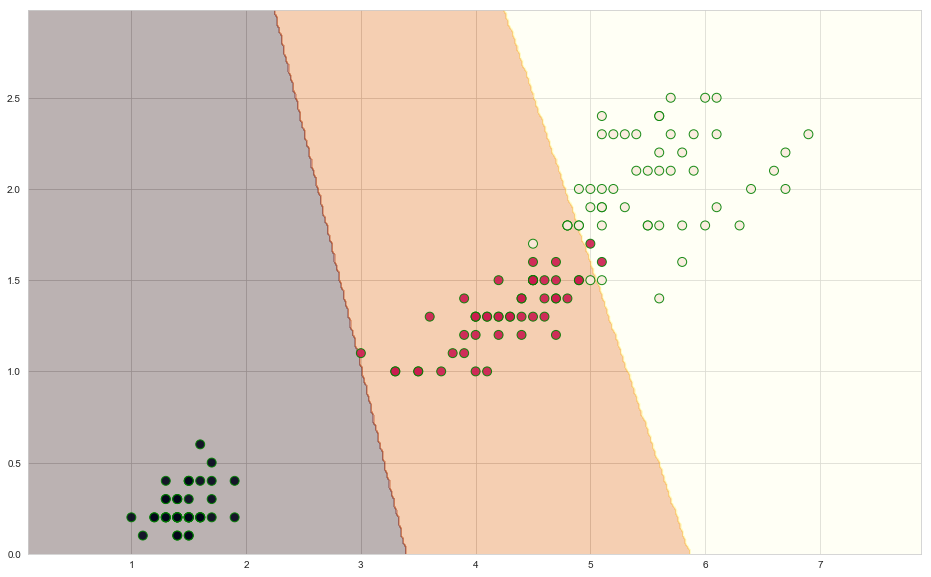

In [15]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(16,10))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80, 
            alpha=0.9, edgecolors='g');

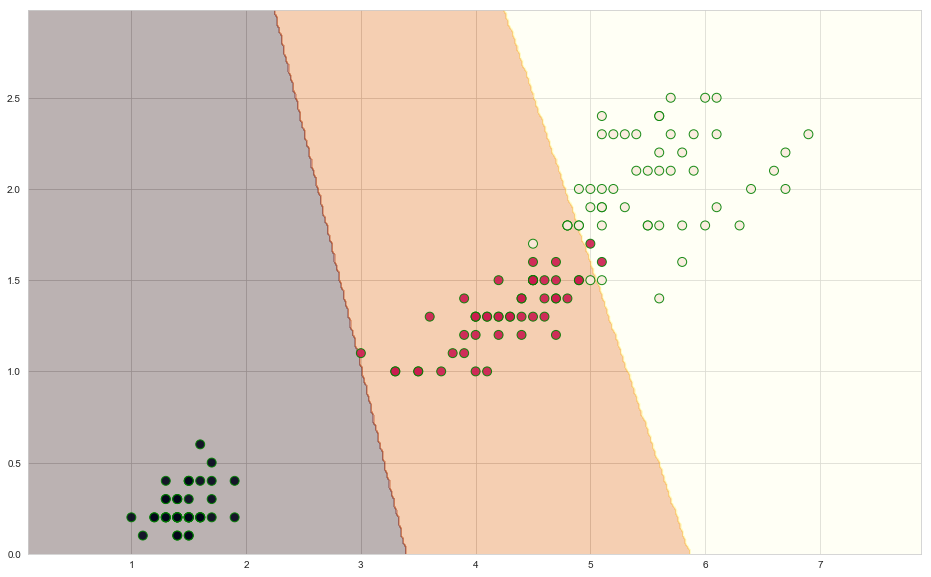

In [16]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(16,10))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80, 
            alpha=0.9, edgecolors='g');

### Linear SVM Implementation